In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
inFile = 'full'
images = np.load('drive/My Drive/' + inFile + '_images.npy', mmap_mode='r')
labels = np.load('drive/My Drive/' + inFile + '_labels.npy', mmap_mode='r')

In [44]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

model = models.Sequential()
model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=2, activation='relu', input_shape=(512, 512, 1)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(filters=2*512, kernel_size=(3, 3), strides=1, activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(4*512, (3, 3), activation='relu'))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 255, 255, 512)     5120      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 85, 85, 512)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 83, 83, 1024)      4719616   
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 27, 27, 1024)      0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 25, 25, 2048)      18876416  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)               

In [45]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy', tf.keras.metrics.AUC()]) #'FalseNegatives', 'FalsePositives'])


history = model.fit(X_train, y_train, epochs=20,batch_size=8,
                    validation_data=(X_test, y_test))

Epoch 1/20
80/80 [==============================] - 17s 214ms/step - loss: 0.7637 - accuracy: 0.5219 - auc_12: 0.5086 - val_loss: 0.6938 - val_accuracy: 0.4688 - val_auc_12: 0.5000
Epoch 2/20
80/80 [==============================] - 17s 212ms/step - loss: 0.6936 - accuracy: 0.5125 - auc_12: 0.4991 - val_loss: 0.6934 - val_accuracy: 0.4688 - val_auc_12: 0.6090
Epoch 3/20
80/80 [==============================] - 17s 211ms/step - loss: 0.6939 - accuracy: 0.5437 - auc_12: 0.5318 - val_loss: 0.6941 - val_accuracy: 0.4688 - val_auc_12: 0.5000
Epoch 4/20
80/80 [==============================] - 17s 211ms/step - loss: 0.6931 - accuracy: 0.5172 - auc_12: 0.4792 - val_loss: 0.6945 - val_accuracy: 0.4688 - val_auc_12: 0.5000
Epoch 5/20
80/80 [==============================] - 17s 211ms/step - loss: 0.6927 - accuracy: 0.5172 - auc_12: 0.4877 - val_loss: 0.6950 - val_accuracy: 0.4688 - val_auc_12: 0.5000
Epoch 6/20
80/80 [==============================] - 17s 211ms/step - loss: 0.6936 - accuracy: 0

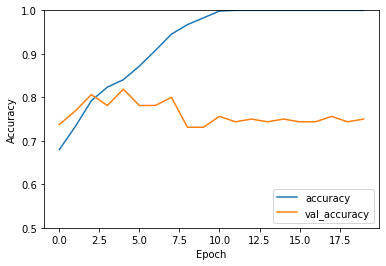

5/5 - 1s - loss: 2.5987 - accuracy: 0.7500 - auc_11: 0.7910
0.7910401225090027


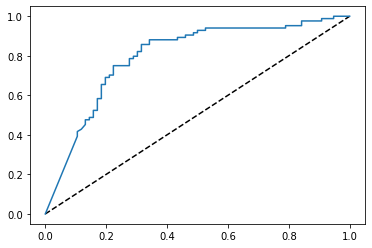

In [42]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(test_acc)

y_pred = model.predict(X_test).ravel()
fpr, tpr, threshold = roc_curve(y_test, y_pred)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.show()

In [23]:
y_test.shape

(160,)